In [2]:
# !pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# AR model
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
url = 'https://raw.githubusercontent.com/mnuzen/156b-learning-support/master/data/us/covid/confirmed_cases.csv'
df = pd.read_csv(url, header=0)

In [4]:
cum_cases = df.iloc[:, 54:]
countyFIPS = df.iloc[:, 0].to_numpy()
daily_cases = cum_cases.diff(axis=1)
daily_cases.iloc[:,0] = cum_cases.iloc[:, 0]

# scale the data (values will be between 0 and 1) to increase the training speed and performance of the model
# scaler = MinMaxScaler()
# scaler.fit(daily_cases)
# daily_cases_scaled = scaler.transform(daily_cases)

# we will use daily data to train
test_size = 14
train_data = cum_cases.iloc[:, :-test_size].to_numpy()
test_data = cum_cases.iloc[:, -test_size:].to_numpy()

Coefficients: [-2.12185649  0.27989208  0.74327405  0.11267185  0.05590323  0.13250408]
predicted=72.329407, expected=71.000000
predicted=79.427528, expected=78.000000
predicted=86.087737, expected=87.000000
predicted=93.399111, expected=98.000000
predicted=101.099256, expected=102.000000
predicted=109.239109, expected=103.000000
predicted=117.727967, expected=109.000000
predicted=126.633789, expected=114.000000
predicted=135.964947, expected=117.000000
predicted=145.737001, expected=123.000000
predicted=155.954239, expected=132.000000
predicted=166.631074, expected=143.000000
predicted=177.780681, expected=147.000000
predicted=189.416779, expected=154.000000
Test RMSE: 17.952


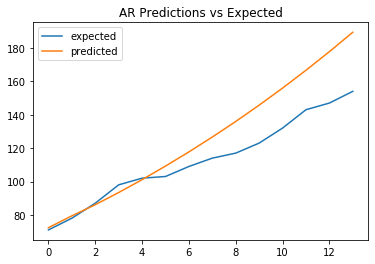

In [5]:
i = 2
model = AutoReg(train_data[i], lags=4, trend='ct')
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions

predictions = model_fit.predict(start=len(train_data[i]), end=len(train_data[i])+len(test_data[i])-1, dynamic=False)
for j in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[j], test_data[i, j]))

rmse = sqrt(mean_squared_error(test_data[i], predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test_data[i], label='expected')
plt.plot(predictions, label='predicted')
plt.title('AR Predictions vs Expected')
plt.legend()
plt.show()

In [6]:
arr_pred = []
for i in range(len(train_data)):
    model = AutoReg(train_data[i], lags=4, trend='ct')
    model_fit = model.fit()

    # make predictions
    predictions = model_fit.predict(start=len(train_data[i])-9, end=len(train_data[i])+len(test_data[i])+67, dynamic=False)
    arr_pred.append(predictions)

In [6]:
daily_pred = np.asarray(arr_pred)
cum_pred = np.zeros((len(train_data), 91))
cum_pred[:, 0]= np.add(cum_cases.iloc[:, -24], daily_pred[:, 0])
for i in range(1, len(daily_pred[0])):
    cum_pred[:, i]= np.add(cum_pred[:, i-1], daily_pred[:, i])
print(cum_pred.shape)
print(cum_cases.iloc[:, -test_size-9:])

rmse = sqrt(mean_squared_error(cum_pred[:, :-68], cum_cases.iloc[:, -test_size-9:]))
print('Test RMSE: %.3f' % rmse)

(3195, 91)
      4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  \
0          0       0       0       0       0       0       0        0   
1         12      12      12      12      12      12      17       17   
2         28      29      34      38      42      49      59       59   
3          1       2       2       3       3       3       7        9   
4          4       4       7       7       8       9      11       11   
...      ...     ...     ...     ...     ...     ...     ...      ...   
3190       3       4       5       5       6       6       6        7   
3191      32      36      39      40      44      45      50       53   
3192       1       2       2       3       3       3       4        4   
3193       2       2       4       4       5       5       5        5   
3194       0       0       0       0       0       0       0        0   

      4/11/20  4/12/20  ...  4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  \
0           0        0  ...        0

In [8]:
print(cum_pred)
print(np.size(cum_pred,1))
print("test")
print(np.size(cum_pred,0))
print(cum_pred.shape)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.15484172e+01 3.29433477e+01 4.60215241e+01 ... 4.00965768e+03
  4.08966749e+03 4.17045686e+03]
 [5.39362001e+01 8.59635752e+01 1.19993955e+02 ... 8.23611512e+04
  8.56358648e+04 8.90203706e+04]
 ...
 [1.87843738e+00 3.48457463e+00 5.74331354e+00 ... 9.82420320e+02
  1.00263971e+03 1.02306386e+03]
 [4.15345024e+00 6.68498756e+00 9.32823967e+00 ... 1.17827247e+03
  1.20213331e+03 1.22623127e+03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
91
test
3195
(3195, 91)


In [9]:
# ret = cum_pred[0]
ret = cum_pred[:,0]
ret1 = cum_pred[:,1]
ret2 = cum_pred[:,2]

fin = np.concatenate((ret, ret1), axis=0)
fin = np.concatenate((fin, ret2), axis=0)

print(fin.shape)
print(fin)

(9585,)
[ 0.         21.54841721 53.93620011 ...  5.74331354  9.32823967
  0.        ]


In [14]:
end = []
for i in range(len(cum_pred[0])):
    add = cum_pred[:,i] 
    end = np.concatenate((end, add), axis=0)
    print(add)
print(end.shape)

[ 0.         21.54841721 53.93620011 ...  1.87843738  4.15345024
  0.        ]
[ 0.         32.94334767 85.96357517 ...  3.48457463  6.68498756
  0.        ]
[  0.          46.02152411 119.99395472 ...   5.74331354   9.32823967
   0.        ]
[  0.          58.21957085 158.5659863  ...   8.27435257  13.07911265
   0.        ]
[  0.          71.35351514 201.40778091 ...  11.45799325  17.53292749
   0.        ]
[  0.          84.80563148 248.36527145 ...  14.91393405  22.81917015
   0.        ]
[  0.          98.57591988 302.14239317 ...  18.47155447  27.94335491
   0.        ]
[  0.         115.97886491 365.17447968 ...  22.1507375   33.17925446
   0.        ]
[  0.         134.79619618 430.53451577 ...  26.55762042  38.19831382
   0.        ]
[  0.         152.26173894 502.8639232  ...  31.06618294  43.27060546
   0.        ]
[  0.         171.01106622 582.29145077 ...  35.42556434  48.44400315
   0.        ]
[  0.         189.39486184 668.37918763 ...  40.08563666  53.76107291
   0.  

In [15]:
#print(cum_cases.iloc[:, -test_size:])
#cum_pred.to_csv(r'final.csv', index = False, header=True)
np.savetxt(r'entry2.csv',end, delimiter=',')

In [12]:
fin = cum_pred.transpose()
fin2 = fin.transpose()
print(fin.shape)
np.savetxt(r'C:\Users\Melba\Desktop\fin.csv',fin, delimiter=',')
#s = pd.Series(fin)
#s.to_csv (r'C:\Users\Melba\Desktop\fin.csv', index = False, header=True)


(91, 3195)


In [23]:
url = 'https://raw.githubusercontent.com/mnuzen/156b-learning-support/master/sample_submission.csv'
df = pd.read_csv(url, header=0)

In [24]:
print(df)

                      id   10   20   30   40   50   60   70   80   90
0       2020-04-01-10001  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1       2020-04-01-10003  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2       2020-04-01-10005  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3        2020-04-01-1001  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4        2020-04-01-1003  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
293288   2020-06-30-9007  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
293289   2020-06-30-9009  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
293290   2020-06-30-9011  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
293291   2020-06-30-9013  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
293292   2020-06-30-9015  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[293293 rows x 10 columns]
